In [ ]:
import numpy as np
import pandas as pd
import numpy.random as nr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')
from sklearn.cluster import KMeans
import seaborn as sns

from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130710_timesequence_fin_exist', 'r') as f1: 
  f1=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130710_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130711_timesequence_fin_exist', 'r') as f2: 
  f2=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130711_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130712_timesequence_fin_exist', 'r') as f3: 
  f3=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130712_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130713_timesequence_fin_exist', 'r') as f4: 
  f4=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130713_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130714_timesequence_fin_exist', 'r') as f5: 
  f5=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130714_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130715_timesequence_fin_exist', 'r') as f6: 
  f6=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130715_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130716_timesequence_fin_exist', 'r') as f7: 
  f7=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130716_timesequence_fin_exist', 'r')

flist=[f1,f2,f3,f4,f5,f6,f7]
deptime = []  # 8(9) 출발시간
deploc = {} # 9(10) 출발장소
deploc2= [] # 출발장소 리스트형

arrtime = []  # 10(11) 도착시간
arrloc = {} #11(12) 도착장소
arrloc2=[] # 도착장소 리스트형

mostplace={}
spendtime={}
spendtime2={}
avestdtime={}
mostinfo={}

함수
-----------------------

In [ ]:
#함수

def caltime(x):
  ye=x//10**10
  mo=(x//10**8)%100
  da=(x//10**6)%100
  ho=(x%10**6)//10**4
  mi=(x%10**4)//100
  se=(x%100)

  scalesec=ho * 3600 + mi * 60 + se
  return [ye,mo,da,ho,mi,se,scalesec]

def caltimeback(x):
  bho = x // 3600
  bmi = x % 3600 // 60
  bse = x % 60
  return [bho,bmi,bse]

Main Part
---------------

In [ ]:
statime={}
mintime={}
mintime_dest={}
realtake=0
for j in range(1): #len(flist)
  tryf=flist[j]
  while True:    # 파일의 줄을 읽어서 한 줄을 하나의 문자열로 저장함(리스트형식으로)
    line=tryf.readline()
    if not line: 
      print('끝')
      break
    line=line.split(',')
    #n=list(filter(None,n))

    #시간계산
    nstat=int(line[8]) #[ye,mo,da,ho,mi,se,scalesec]
    ndest=int(line[10])
    nstat=caltime(nstat)
    ndest=caltime(ndest) 
    
    taketime=ndest[6]-nstat[6] # 걸린시간 
    if taketime>0 and line[9]=='0216' and line[11]=='0222':
    #if taketime>0 and line[11]=='0241':# and line[7]=='06':   #이대역 0241, 을지로입구 0202 , 420초 : 신도림 0234 구로 0232 240초
      str1=nstat[6] #출발역+도착역으로 key값 저장
      str2=ndest[6]
      taketime -= realtake
      #print("원시간",line[8], "바꾼시간",nstat)
      try:
        spendtime[str1].append(taketime) # value를 리스트로 지정하면 거기에 리스트함수 적용가능
      except:
        spendtime[str1] = [taketime]
  
      try:
        spendtime2[str2].append(taketime)
      except:
        spendtime2[str2] = [taketime]
          # 도착, 출발
      try:
        mostplace[str1] += 1
      except:
        mostplace[str1] = 1
      ttime= nstat[3]*3600 + nstat[4]*60
      try:
        mintime[ttime] += 1
      except:
        mintime[ttime]  = 1
      ttime2=ndest[3]*3600 + ndest[4]*60
      try:
        mintime_dest[ttime2] +=1
      except:
        mintime_dest[ttime2] = 1

끝


In [ ]:
avekey=list(spendtime.keys())
for i in range(0, len(list(spendtime.keys()))):
  str1=avekey[i]
  aven=np.mean(spendtime[str1])
  stdn=np.std(spendtime[str1])
  manytimes=mostplace[str1]
  mostinfo[str1] = [manytimes,aven,stdn]
t=[]
#dic를 items()를 활용해서 튜플로 바꿔준 다음에 정렬하기.
#print("가장많이 이용한 구간 랭킹=",sorted(mostplace.items(), key= lambda x: x[1], reverse= True))
ranking1=sorted(mostinfo.items(), key= lambda x: x[1], reverse= True)

In [ ]:
mostinfo2={}
avekey2=list(spendtime2.keys())
for i in range(0, len(list(spendtime2.keys()))):
  str2=avekey2[i]
  aven2=np.mean(spendtime2[str2])
  stdn2=np.std(spendtime2[str2])
  manytimes2=mostplace[str1]
  mostinfo2[str1] = [manytimes2,aven2,stdn2]
t=[]
#dic를 items()를 활용해서 튜플로 바꿔준 다음에 정렬하기.
#print("가장많이 이용한 구간 랭킹=",sorted(mostplace.items(), key= lambda x: x[1], reverse= True))
ranking2=sorted(mostinfo2.items(), key= lambda x: x[1], reverse= True)

In [ ]:
for i in range(10):
  print(i+1,'순위:',"구간",ranking1[i])
print("구간별 평균시간과 표준편차 랭킹")
for i in range(3):
  str0=ranking1[i][0]
  print(spendtime[str0])

1 순위: 구간 (30506, [4, 1074.25, 48.25129531940049])
2 순위: 구간 (67211, [3, 1304.6666666666667, 44.4996878890428])
3 순위: 구간 (36549, [3, 1238.6666666666667, 177.21988852521292])
4 순위: 구간 (33861, [3, 1201.3333333333333, 17.613126418163876])
5 순위: 구간 (33897, [3, 1196.0, 71.6147098483731])
6 순위: 구간 (32981, [3, 1178.0, 9.41629792788369])
7 순위: 구간 (23165, [3, 1142.6666666666667, 13.695092389449425])
8 순위: 구간 (33487, [3, 1132.3333333333333, 8.379870059984356])
9 순위: 구간 (33031, [3, 1108.3333333333333, 4.642796092394706])
10 순위: 구간 (70089, [3, 1106.0, 4.96655480858378])
구간별 평균시간과 표준편차 랭킹
[1122, 1026, 1026, 1123]
[1367, 1266, 1281]
[1489, 1124, 1103]


그래프 그리기
--------------

In [ ]:
plt.figure(figsize=(40,10))
keylist2=list(mintime.keys())
print(mintime)
rank_num=sorted(mintime.items(), key= lambda x: x[1], reverse= True)
mintime2=sorted(mintime.items(), key= lambda x: x[0], reverse= False)
ylist=[]
'''
for i in range(len(mintime2)):
  index=mintime2[i]
  ylist.append(mintime2[index])
plt.scatter(keylist2, ylist,c='g',s=1)
'''
xlist3=[]
ylist3=[]
for i in range(len(mintime2)):
  if mintime2[i][0]>15000:
    xlist3.append(mintime2[i][0])
    ylist3.append(mintime2[i][1])

keylist2_dest=list(mintime_dest.keys())
print(mintime_dest)
rank_num_dest=sorted(mintime_dest.items(), key= lambda x: x[1], reverse= True)
mintime2_dest=sorted(mintime_dest.items(), key= lambda x: x[0], reverse= False)
ylist=[]
'''
for i in range(len(mintime2)):
  index=mintime2[i]
  ylist.append(mintime2[index])
plt.scatter(keylist2, ylist,c='g',s=1)
'''
xlist4=[]
ylist4=[]
for i in range(len(mintime2_dest)):
  if mintime2_dest[i][0]>15000:
    xlist4.append(mintime2_dest[i][0])
    ylist4.append(mintime2_dest[i][1])
print(rank_num)
print(mintime2)

{35520: 12, 46380: 9, 64440: 6, 30120: 24, 29520: 12, 66960: 13, 34080: 29, 39000: 10, 57060: 8, 29460: 32, 76020: 6, 28980: 22, 66540: 10, 31260: 16, 59280: 6, 84120: 1, 52200: 12, 29820: 20, 64080: 13, 64920: 12, 57240: 3, 47820: 4, 29400: 26, 39420: 9, 53400: 9, 39900: 7, 48420: 15, 25080: 8, 33420: 22, 27480: 14, 68160: 14, 50280: 12, 48840: 15, 26580: 24, 27120: 34, 60360: 6, 74820: 6, 35220: 5, 31380: 20, 31140: 31, 52140: 11, 57600: 7, 33060: 18, 71880: 6, 33720: 8, 53760: 5, 38760: 5, 37980: 8, 75120: 9, 70980: 11, 36660: 6, 74760: 2, 73200: 6, 57120: 9, 65880: 17, 41220: 12, 48780: 16, 60900: 5, 29700: 30, 41640: 14, 43740: 8, 25980: 14, 30720: 27, 76920: 3, 38460: 9, 28560: 14, 67800: 8, 30480: 46, 63180: 16, 47340: 7, 27900: 9, 41160: 5, 62100: 7, 62940: 12, 65160: 10, 32400: 29, 31860: 11, 63060: 19, 24900: 10, 27840: 18, 30600: 16, 83700: 1, 27360: 38, 77880: 3, 30360: 21, 34440: 14, 31980: 20, 65640: 8, 31440: 13, 52800: 6, 33000: 28, 58140: 3, 67260: 15, 53880: 4, 35820:

<Figure size 2880x720 with 0 Axes>

In [ ]:
#출발역 사용자 빈도 수 위한 과정


In [ ]:
print(rank_num[10])
#print(rank_num.index((29460, 620)))

(31140, 31)


기울기1: -0.04230769230769231
기울기2: 0.04794007490636704
기울기1: 0.01675531914893617
기울기2: 0.01688034188034188


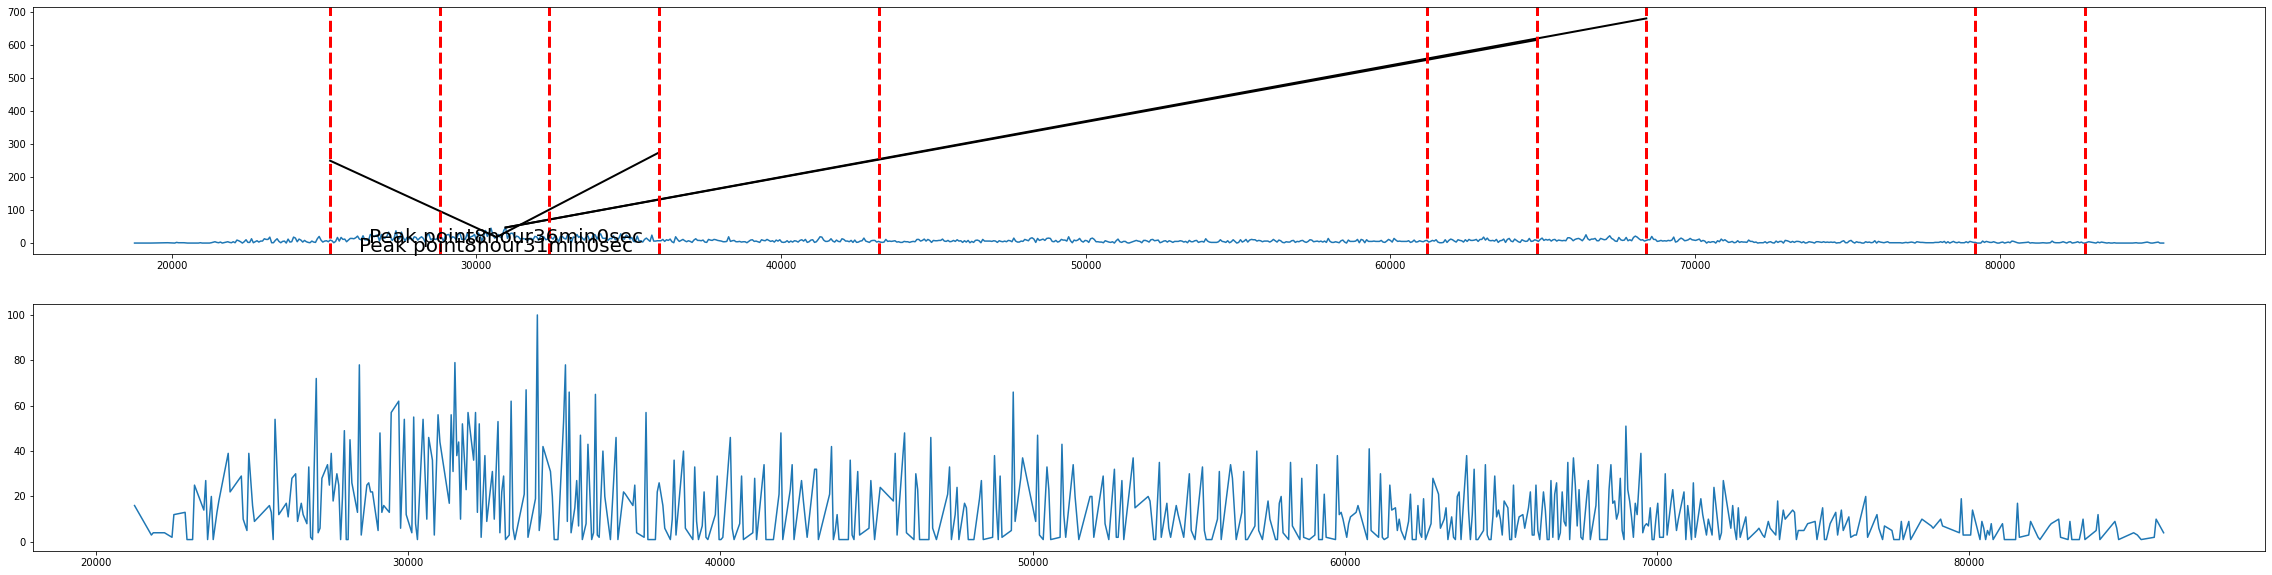

In [ ]:
plt.figure(figsize=(40,10))
plt.xlim([15000, 85000]) 
plt.ylim([0, 50])
plt.subplot(211)
plt.plot(xlist3,ylist3)
#peak
#plt.hlines(rank_num[0][1], 15000, rank_num[0][0], colors='g', linewidth=1)
#plt.vlines(rank_num[0][0], 0, rank_num[0][1], colors='g', linewidth=1)
p1i=76
ppint1= caltimeback(rank_num[p1i][0])
plt.text(rank_num[p1i][0],rank_num[p1i][1],
         'Peak point' + str(ppint1[0]) + 'hour' + str(ppint1[1]) + 'min' + str(ppint1[2]) +'sec' ,
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
#plt.hlines(rank_num[2][1], 15000, rank_num[2][0], colors='g', linewidth=1)
#plt.vlines(rank_num[2][0], 0, rank_num[2][1], colors='g', linewidth=1)
p2i=0
ppint2= caltimeback(rank_num[p2i][0])
plt.text(rank_num[p2i][0],rank_num[p2i][1],
         'Peak point' + str(ppint2[0]) + 'hour' + str(ppint2[1]) + 'min' + str(ppint2[2]) +'sec',
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
'''
ppint3= caltimeback(rank_num[142][0])
plt.text(rank_num[142][0],rank_num[142][1],
         'Peak point' + str(ppint3[0]) + 'hour' + str(ppint3[1]) + 'min' + str(ppint3[2]) +'sec',
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
'''
#기울기 변화
fdx1 = 25200 ; fdy1 = 250
fdx2 = rank_num[p1i][0] ; fdy2 = rank_num[p1i][1]
fdx3 = 36000 ; fdy3 = 275
print('기울기1:', (fdy2-fdy1) / (fdx2-fdx1) )
print('기울기2:', (fdy3-fdy2) / (fdx3-fdx2))
plt.plot([fdx1,fdx2],[fdy1,fdy2], c= 'k' , linewidth=2)
plt.plot([fdx2,fdx3],[fdy2,fdy3], c= 'k' , linewidth=2)

fdx12 = 64800 ; fdy12 = 615
fdx22 = rank_num[p2i][0] ; fdy22 = rank_num[p2i][1]
fdx32 = 68400 ; fdy32 = 680
print('기울기1:', (fdy22-fdy12) / (fdx22-fdx12) )
print('기울기2:', (fdy32-fdy22) / (fdx32-fdx22))
plt.plot([fdx12,fdx22],[fdy12,fdy22], c= 'k' , linewidth=2)
plt.plot([fdx22,fdx32],[fdy22,fdy32], c= 'k' , linewidth=2)


plt.axvline(25200, color='r', linestyle='--', linewidth=3, label='7시')
plt.axvline(28800, color='r', linestyle='--', linewidth=3, label='8시')
plt.axvline(32400, color='r', linestyle='--', linewidth=3, label='9시')
plt.axvline(36000, color='r', linestyle='--', linewidth=3, label='10시')
plt.axvline(43200, color='r', linestyle='--', linewidth=3, label='12시')
plt.axvline(61200, color='r', linestyle='--', linewidth=3, label='17시')
plt.axvline(64800, color='r', linestyle='--', linewidth=3, label='18시')
plt.axvline(68400, color='r', linestyle='--', linewidth=3, label='19시')
plt.axvline(79200, color='r', linestyle='--', linewidth=3, label='22시')
plt.axvline(82800, color='r', linestyle='--', linewidth=3, label='23시')
plt.subplot(212)
plt.plot(xlist4,ylist4)

In [ ]:
print(spendtime)
print(spendtime2)

{35576: [1100], 46434: [909], 64496: [930, 939], 30156: [1254], 29536: [965], 66998: [1146, 1138], 34129: [933], 39034: [854], 57118: [844], 29487: [1065], 76061: [1050], 29034: [886, 877, 857], 66554: [808], 31291: [988], 59320: [1105], 84172: [1088], 52210: [1063, 1062], 29848: [960, 951], 64093: [868], 64956: [1021, 994], 57263: [1067], 47832: [949], 29455: [1082], 39473: [866], 53406: [1281], 39901: [766], 48426: [959], 25088: [790], 33441: [890], 27530: [907], 68198: [872, 836], 50320: [1044], 48889: [814, 802], 26583: [868], 27179: [790], 60372: [1123], 74821: [933], 35278: [1008], 31396: [927], 31161: [1008, 984], 52186: [1091], 57656: [994], 33064: [1083], 71893: [749, 998], 33746: [1304], 53762: [901], 38764: [1134], 38020: [1213], 75167: [789], 70998: [1161], 36665: [980], 74767: [814], 73224: [866], 57129: [1231], 65922: [862], 41246: [1076], 48807: [886, 886], 60957: [858], 29712: [960], 41689: [996, 1001], 43786: [1044], 26026: [909, 1566, 816], 30729: [893, 884, 896], 769

In [ ]:
indicate=0
num=len(spendtime)
keylist=list(spendtime.keys())

'''
for i in range(num):
  if sum(spendtime[keylist[i]])>4000:
    print(i)
    #spendtime[i]=ranking1[rank][1][1]
    print(spendtime[keylist[i]])
'''
xlist=[]
ylist=[]
ra = 15000
rb = 90000
print(rb - ra, 720)
for i in range(num):
  x=int(keylist[i])
  y=spendtime[keylist[i]]
  y=np.mean(y)
  if (y < 4500 and  x >ra and  x< rb):
    xlist.append(x)
    ylist.append(y)
#plt.errorbar(ranking1[0][1][1], [0,9] , yerr=0 , c='r', capsize=30) # 실제 평균값에서 에러바

keylist2=list(spendtime2.keys())
num2=len(spendtime2)
xlist2=[]
ylist2=[]
ra2 = 15000
rb2 = 80000
print(rb2 - ra2, 720)
for i in range(num2):
  x2=int(keylist2[i])
  y2=spendtime2[keylist2[i]]
  y2=np.mean(y2)
  if (y2 < 4500 and  x2 >ra2 and  x2< rb2):
    xlist2.append(x2)
    ylist2.append(y2)

75000 720
65000 720


In [ ]:
print(xlist)
print(ylist)

[35576, 46434, 64496, 30156, 29536, 66998, 34129, 39034, 57118, 29487, 76061, 29034, 66554, 31291, 59320, 84172, 52210, 29848, 64093, 64956, 57263, 47832, 29455, 39473, 53406, 39901, 48426, 25088, 33441, 27530, 68198, 50320, 48889, 26583, 27179, 60372, 74821, 35278, 31396, 31161, 52186, 57656, 33064, 71893, 33746, 53762, 38764, 38020, 75167, 70998, 36665, 74767, 73224, 57129, 65922, 41246, 48807, 60957, 29712, 41689, 43786, 26026, 30729, 76954, 38490, 28602, 67859, 30528, 63227, 47345, 27921, 41177, 62115, 62995, 65201, 32415, 48453, 53763, 31907, 63088, 24913, 27881, 30628, 83721, 27393, 77924, 30371, 34485, 32030, 65685, 27896, 30507, 31471, 52834, 33046, 58196, 67306, 53911, 35844, 74002, 67797, 76456, 32545, 35615, 61613, 36277, 65122, 67684, 63256, 68615, 31029, 30929, 30967, 78612, 30588, 49223, 64199, 35273, 26881, 28469, 28608, 26704, 36669, 27754, 69270, 43631, 43257, 57399, 66942, 44134, 63710, 55980, 64836, 41117, 26629, 45914, 28540, 26265, 34724, 52418, 51296, 70304, 56044

8046 8046


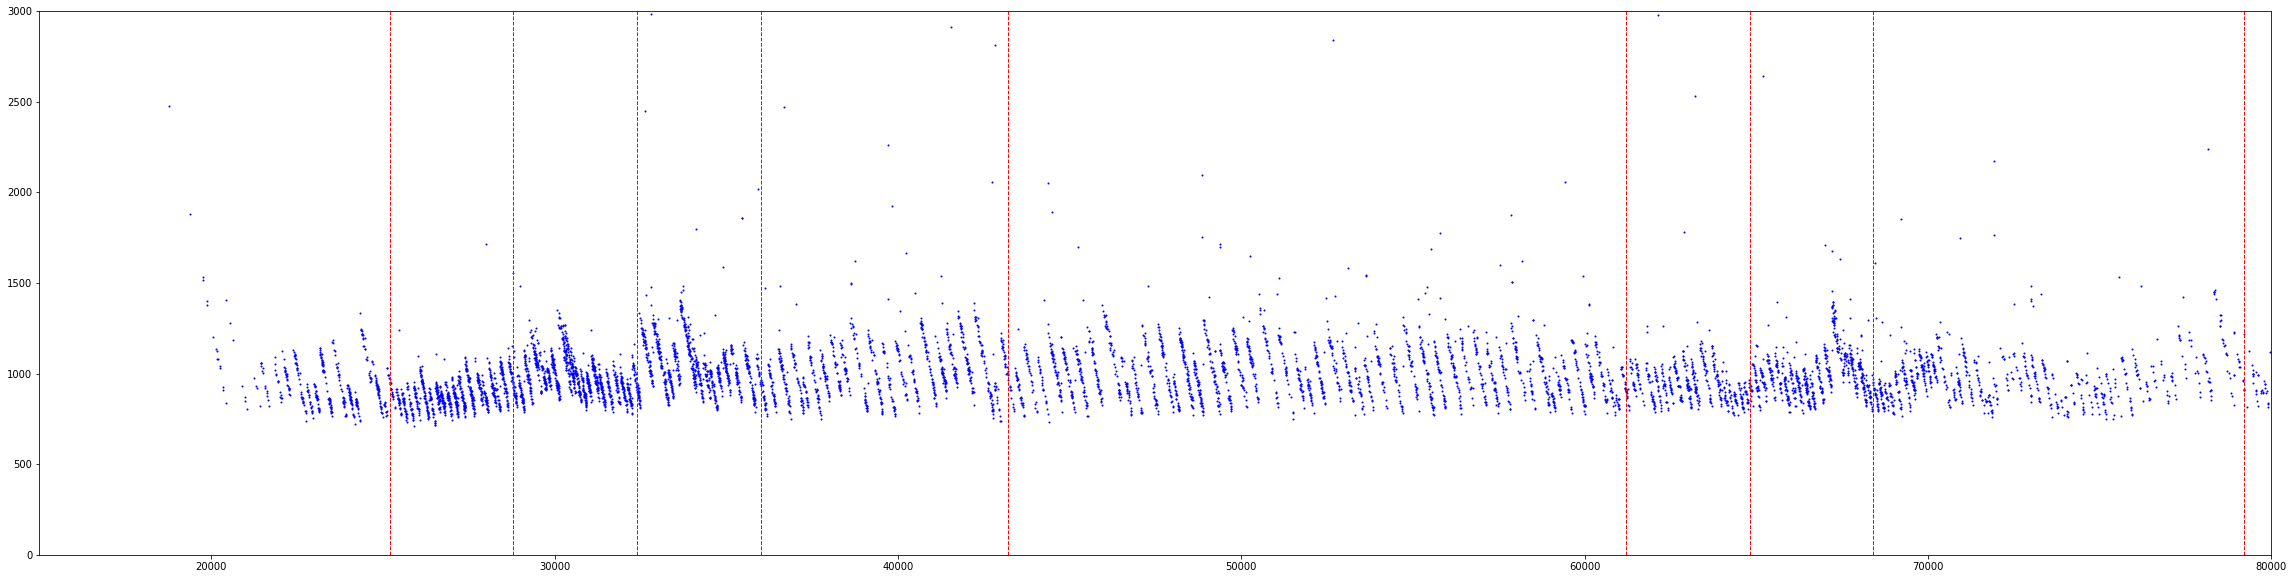

In [ ]:
plt.figure(figsize=(40,10))
plt.xlim([ra,80000])
plt.ylim([0,3000])
plt.axvline(25200, color='r', linestyle='--', linewidth=1, label='7시')
plt.axvline(28800, color='r', linestyle='--', linewidth=1, label='8시')
plt.axvline(32400, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(36000, color='r', linestyle='--', linewidth=1, label='10시')
plt.axvline(43200, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(61200, color='r', linestyle='--', linewidth=1, label='17시')
plt.axvline(64800, color='r', linestyle='--', linewidth=1, label='18시')
plt.axvline(68400, color='r', linestyle='--', linewidth=1, label='19시')
plt.axvline(79200, color='r', linestyle='--', linewidth=1, label='22시')
plt.axvline(82800, color='r', linestyle='--', linewidth=1, label='23시')
#plt.axhline(realtake, color='r', linestyle='--', linewidth=1, label='걸린시간')
print(len(xlist), len(ylist))
plt.scatter(xlist,ylist,c='b',s=1)
#plt.scatter(xlist2,ylist2,c='g',s=1)


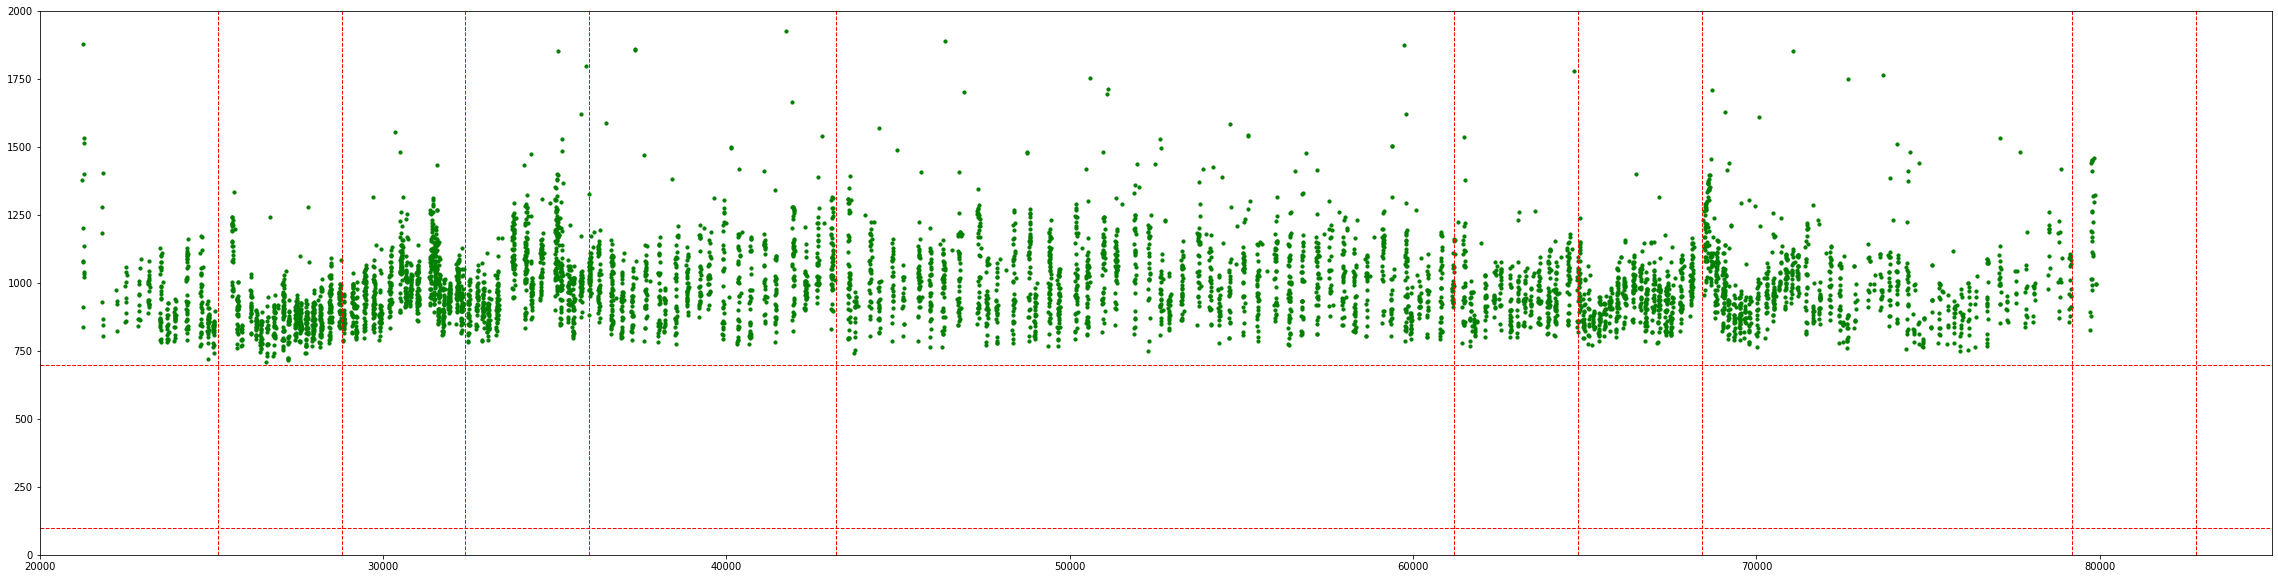

In [ ]:
plt.figure(figsize=(40,10))
plt.xlim([20000,85000])
plt.ylim([0,2000])
plt.scatter(xlist2,ylist2,c='g',s=10)
'''
plt.axvline(55800, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(45000, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(46800, color='r', linestyle='--', linewidth=1, label='13시')
plt.axvline(48600, color='r', linestyle='--', linewidth=1, label='13시')
'''
plt.axvline(25200, color='r', linestyle='--', linewidth=1, label='7시')
plt.axvline(28800, color='r', linestyle='--', linewidth=1, label='8시')
plt.axvline(32400, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(36000, color='r', linestyle='--', linewidth=1, label='10시')
plt.axvline(43200, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(61200, color='r', linestyle='--', linewidth=1, label='17시')
plt.axvline(64800, color='r', linestyle='--', linewidth=1, label='18시')
plt.axvline(68400, color='r', linestyle='--', linewidth=1, label='19시')
plt.axvline(79200, color='r', linestyle='--', linewidth=1, label='22시')
plt.axvline(82800, color='r', linestyle='--', linewidth=1, label='23시')
#plt.axhline(realtake, color='r', linestyle='--', linewidth=1, label='걸린시간')
plt.axhline(100, color='r', linestyle='--', linewidth=1, label='걸린시간')
plt.axhline(700, color='r', linestyle='--', linewidth=1, label='걸린시간')

8046 8046


"\nplt.text(rank_num[p2i][0],rank_num[p2i][1],\n         'Peak point' + str(ppint2[0]) + 'hour' + str(ppint2[1]) + 'min' + str(ppint2[2]) +'sec',\n         fontsize = 20,\n         color='k',\n         horizontalalignment='center',\n         verticalalignment='top')\nplt.scatter(xlist,ylist,c='b',s=5)\nplt.scatter(xlist2,ylist2,c='g',s=5)\n"

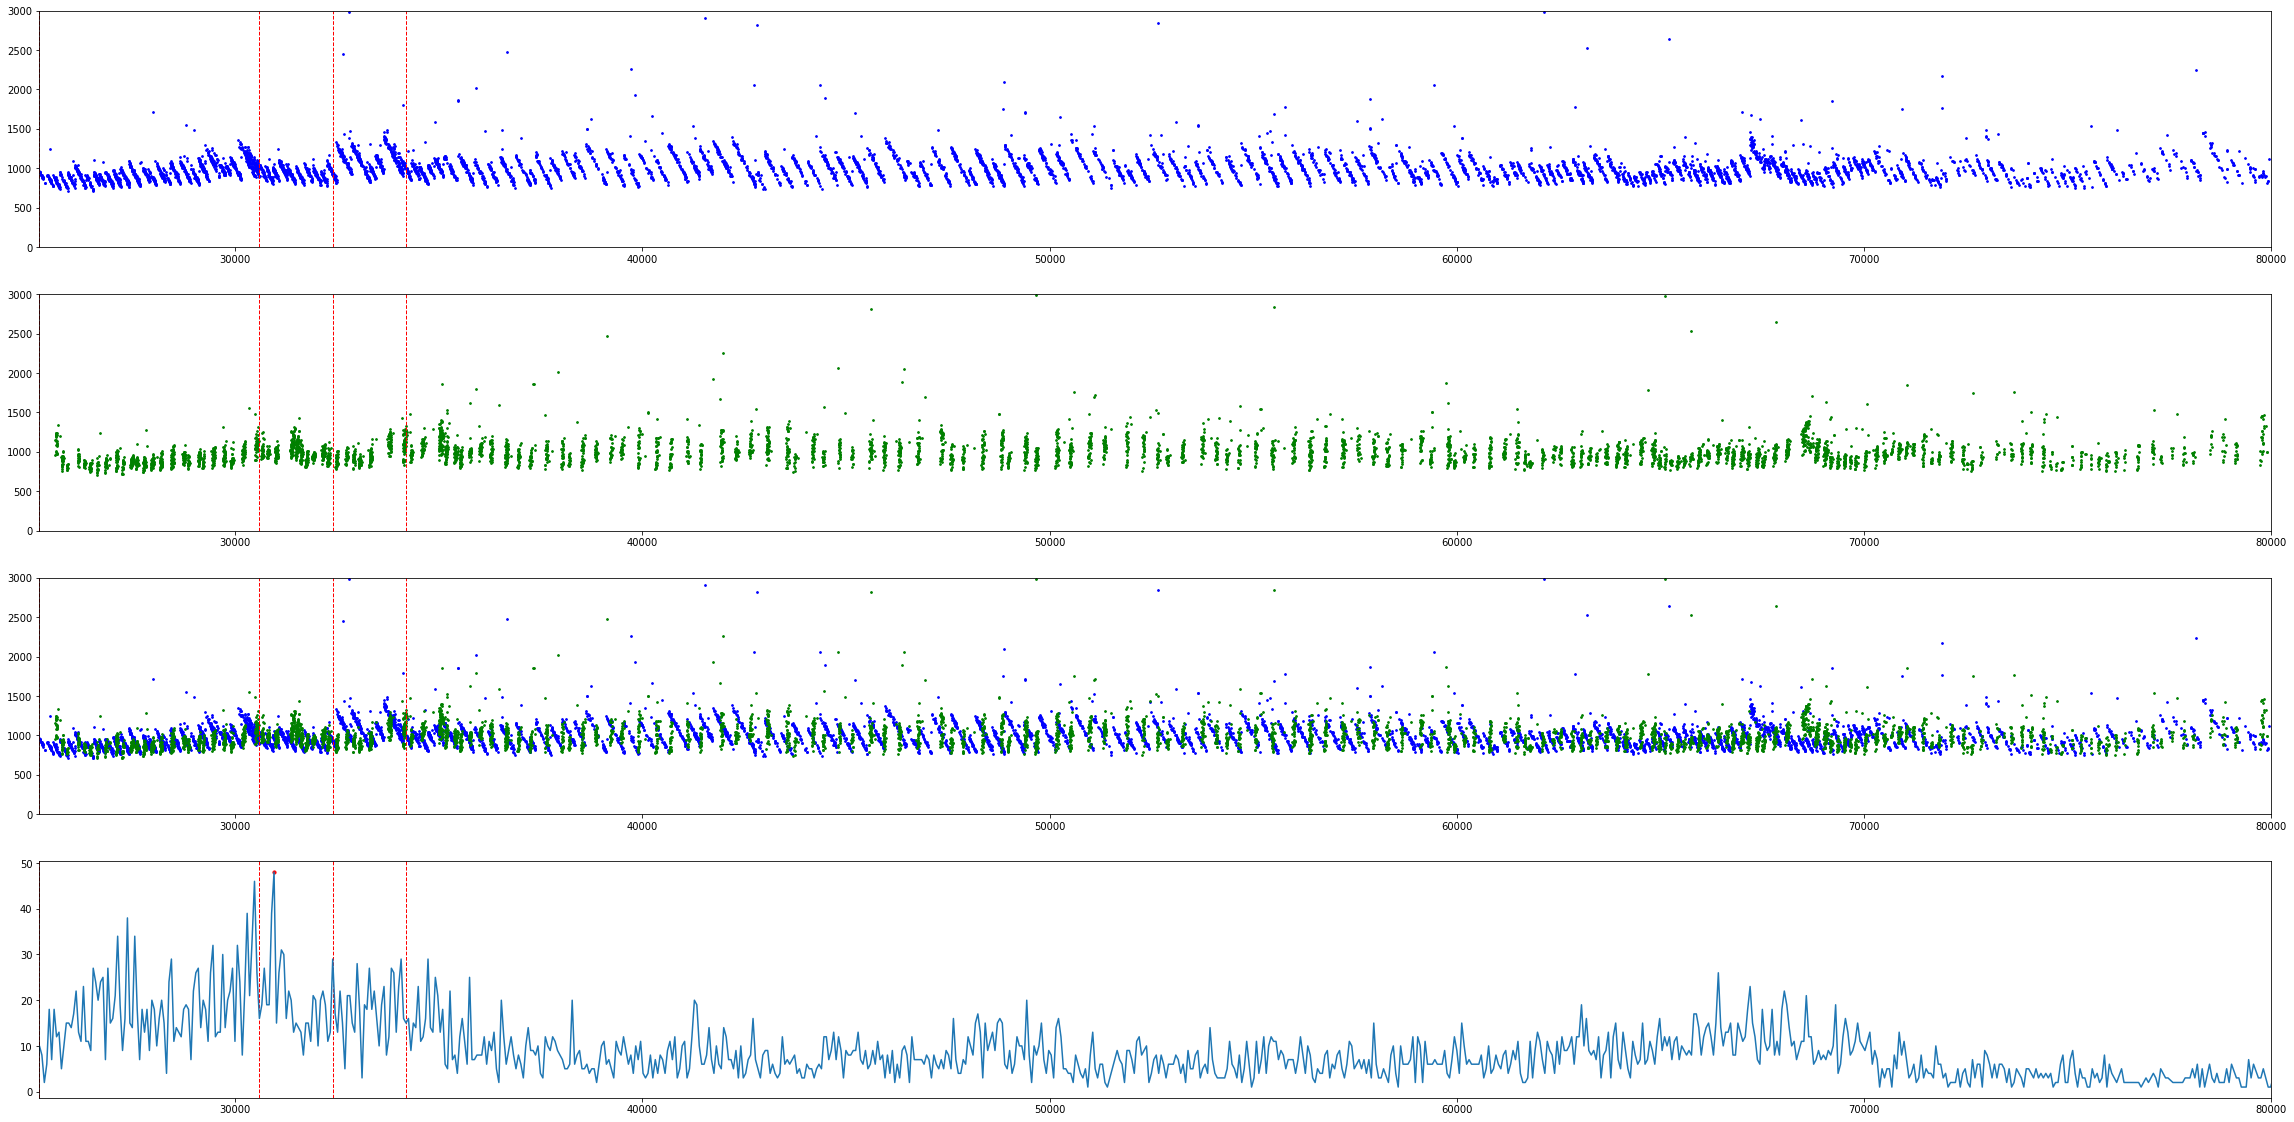

In [ ]:
plt.figure(figsize=(40,20))
plt.axvline(28800, color='r', linestyle='--', linewidth=1, label='8시')
plt.axvline(32400, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(36000, color='r', linestyle='--', linewidth=1, label='10시')
plt.axvline(55800, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(46800, color='r', linestyle='--', linewidth=1, label='13시')
plt.axvline(48600, color='r', linestyle='--', linewidth=1, label='13시')
#plt.axhline(realtake, color='r', linestyle='--', linewidth=1, label='걸린시간')
print(len(xlist), len(ylist))

plt.subplot(311)
xsize1 = 25200 ; xsize2 = 80000
ysize1 = 0 ; ysize2 = 3000

plt.subplot(411)
plt.xlim([xsize1,xsize2])
plt.ylim([ysize1,ysize2])
plt.axvline(25200, color='r', linestyle='--', linewidth=1, label='7시')
plt.axvline(30600, color='r', linestyle='--', linewidth=1, label='8시30분')
plt.axvline(32400, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(34200, color='r', linestyle='--', linewidth=1, label='9시30분')
plt.scatter(xlist,ylist,c='b',s=3)

plt.subplot(412)
plt.xlim([xsize1,xsize2])
plt.ylim([ysize1,ysize2])
plt.axvline(25200, color='r', linestyle='--', linewidth=1, label='7시')
plt.axvline(30600, color='r', linestyle='--', linewidth=1, label='8시30분')
plt.axvline(32400, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(34200, color='r', linestyle='--', linewidth=1, label='9시30분')
plt.scatter(xlist2,ylist2,c='g',s=3)

plt.subplot(413)
plt.xlim([xsize1,xsize2])
plt.ylim([ysize1,ysize2])
plt.axvline(25200, color='r', linestyle='--', linewidth=1, label='7시')
plt.axvline(30600, color='r', linestyle='--', linewidth=1, label='8시30분')
plt.axvline(32400, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(34200, color='r', linestyle='--', linewidth=1, label='9시30분')
plt.scatter(xlist,ylist,c='b',s=3)
plt.scatter(xlist2,ylist2,c='g',s=3)

plt.subplot(414)
plt.axvline(25200, color='r', linestyle='--', linewidth=1, label='7시')
plt.axvline(30600, color='r', linestyle='--', linewidth=1, label='8시30분')
plt.axvline(32400, color='r', linestyle='--', linewidth=1, label='9시')
plt.axvline(34200, color='r', linestyle='--', linewidth=1, label='9시30분')
plt.xlim([xsize1,xsize2])
#plt.ylim([ysize1,80])
plt.plot(xlist3,ylist3)
p2i=0
ppint2= caltimeback(rank_num[p2i][0])
plt.scatter(rank_num[p2i][0],rank_num[p2i][1], c='r', s=10)
'''
plt.text(rank_num[p2i][0],rank_num[p2i][1],
         'Peak point' + str(ppint2[0]) + 'hour' + str(ppint2[1]) + 'min' + str(ppint2[2]) +'sec',
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
plt.scatter(xlist,ylist,c='b',s=5)
plt.scatter(xlist2,ylist2,c='g',s=5)
'''

In [ ]:
print(spendtime)
print(len(spendtime))
print(len(spendtime2))

{35576: [1100], 46434: [909], 64496: [930, 939], 30156: [1254], 29536: [965], 66998: [1146, 1138], 34129: [933], 39034: [854], 57118: [844], 29487: [1065], 76061: [1050], 29034: [886, 877, 857], 66554: [808], 31291: [988], 59320: [1105], 84172: [1088], 52210: [1063, 1062], 29848: [960, 951], 64093: [868], 64956: [1021, 994], 57263: [1067], 47832: [949], 29455: [1082], 39473: [866], 53406: [1281], 39901: [766], 48426: [959], 25088: [790], 33441: [890], 27530: [907], 68198: [872, 836], 50320: [1044], 48889: [814, 802], 26583: [868], 27179: [790], 60372: [1123], 74821: [933], 35278: [1008], 31396: [927], 31161: [1008, 984], 52186: [1091], 57656: [994], 33064: [1083], 71893: [749, 998], 33746: [1304], 53762: [901], 38764: [1134], 38020: [1213], 75167: [789], 70998: [1161], 36665: [980], 74767: [814], 73224: [866], 57129: [1231], 65922: [862], 41246: [1076], 48807: [886, 886], 60957: [858], 29712: [960], 41689: [996, 1001], 43786: [1044], 26026: [909, 1566, 816], 30729: [893, 884, 896], 769

3600 420
w: 0.999692255067806 b: -54834.44198198342 w/b -1.8231101091468535e-05


(0.0, 750.0)

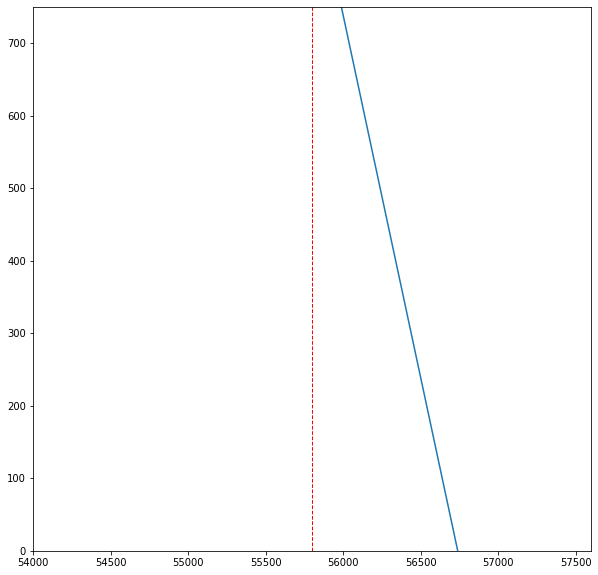

In [ ]:
#선형학습
plt.figure(figsize=(10,10))
w=1
b=1

def cost(w,b):
  for i in range(len(xlist)):
    cf = (1/(2*len(xlist))) * (w * xlist[i] + b - ylist[i])**2
  return cf

num=len(spendtime)
keylist=list(spendtime.keys())
xlin=[] ; ylin=[]
ra = 54000 ; rb = 57600
print(rb - ra,420)
for i in range(num):
  x=int(keylist[i])
  y=spendtime[keylist[i]]
  y=np.mean(y)
  if (y < 4500 and  x >ra and  x< rb):
    xlin.append(x)
    ylin.append(y)
plt.scatter(xlin,ylin,c='b',s=10)
plt.xlim(ra,rb)
xlin = np.array(xlin)
ylin = np.array(ylin)
x = xlin
xx = xlin * xlin
y= ylin
xy = xlin * ylin

ex = np.mean(x)
exx = np.mean(xx)
ey = np.mean(y)
exy= np.mean(xy)
w = ((ex)**2 -(ex*ey) + (exy) ) / exx
b = -1 * ex * w + ey
print('w:',w,'b:',b, 'w/b',w/b)

xlin = sorted(xlin)
stax = xlin[0] ; finx = xlin[len(xlin)-1]
stay = stax * w + b ; finy = finx * w + b
plt.plot([stax,finx],[finy,stay])
plt.axvline(45000, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(46800, color='r', linestyle='--', linewidth=1, label='13시')
plt.axvline(48600, color='r', linestyle='--', linewidth=1, label='13시')
plt.axvline(55800, color='r', linestyle='--', linewidth=1, label='12시')
plt.xlim([54000,57600])
plt.ylim([0,750])

3600 720
w: 0.9994320149532607 b: -44126.1502001069 w/b -2.2649426936656702e-05
43532 46796
-618.8757251615534 2643.2703716458855


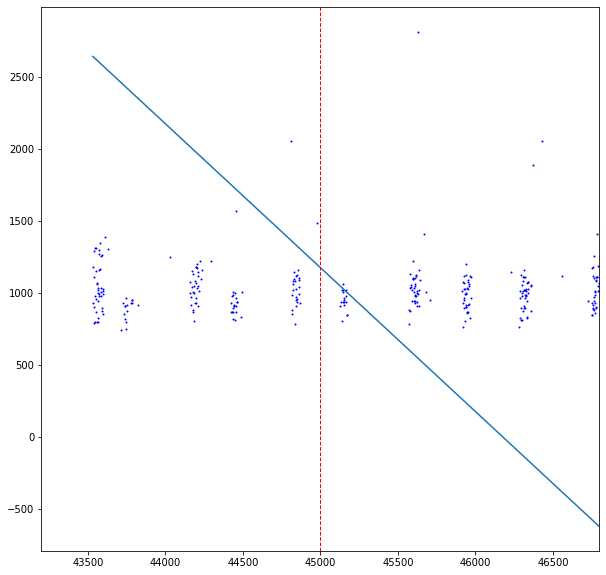

In [ ]:
#선형학습
plt.figure(figsize=(10,10))
w=1
b=1

def cost(w,b):
  for i in range(len(xlist)):
    cf = (1/(2*len(xlist))) * (w * xlist[i] + b - ylist[i])**2
  return cf

num=len(spendtime2)
keylist2=list(spendtime2.keys())
xlin=[] ; ylin=[]
ra = 43200 ; rb = 46800
print(rb - ra, 720)
for i in range(num):
  x=int(keylist2[i])
  y=spendtime2[keylist2[i]]
  y=np.mean(y)
  if (y < 4500 and  x >ra and  x< rb):
    xlin.append(x)
    ylin.append(y)
plt.scatter(xlin,ylin,c='b',s=1 )
plt.xlim(ra,rb)
xlin = np.array(xlin)
ylin = np.array(ylin)
x = xlin
xx = xlin * xlin
y= ylin
xy = xlin * ylin

ex = np.mean(x)
exx = np.mean(xx)
ey = np.mean(y)
exy= np.mean(xy)
w = ((ex)**2 -(ex*ey) + (exy) ) / exx
b = -1 * ex * w + ey
print('w:',w,'b:',b, 'w/b',w/b)

xlin = sorted(xlin)
stax = xlin[0] ; finx = xlin[len(xlin)-1]
stay = stax * w + b ; finy = finx * w + b
plt.plot([stax,finx],[finy,stay])
print(stax, finx)
print(stay, finy)
plt.axvline(45000, color='r', linestyle='--', linewidth=1, label='12시')
plt.axvline(46800, color='r', linestyle='--', linewidth=1, label='13시')
plt.axvline(48600, color='r', linestyle='--', linewidth=1, label='13시')

In [ ]:
print(spendtime)

{35576: [1100], 46434: [909], 64496: [930, 939], 30156: [1254], 29536: [965], 66998: [1146, 1138], 34129: [933], 39034: [854], 57118: [844], 29487: [1065], 76061: [1050], 29034: [886, 877, 857], 66554: [808], 31291: [988], 59320: [1105], 84172: [1088], 52210: [1063, 1062], 29848: [960, 951], 64093: [868], 64956: [1021, 994], 57263: [1067], 47832: [949], 29455: [1082], 39473: [866], 53406: [1281], 39901: [766], 48426: [959], 25088: [790], 33441: [890], 27530: [907], 68198: [872, 836], 50320: [1044], 48889: [814, 802], 26583: [868], 27179: [790], 60372: [1123], 74821: [933], 35278: [1008], 31396: [927], 31161: [1008, 984], 52186: [1091], 57656: [994], 33064: [1083], 71893: [749, 998], 33746: [1304], 53762: [901], 38764: [1134], 38020: [1213], 75167: [789], 70998: [1161], 36665: [980], 74767: [814], 73224: [866], 57129: [1231], 65922: [862], 41246: [1076], 48807: [886, 886], 60957: [858], 29712: [960], 41689: [996, 1001], 43786: [1044], 26026: [909, 1566, 816], 30729: [893, 884, 896], 769

In [ ]:
#K means
num=len(spendtime)
k_keylist=list(spendtime.keys())
k_xlist=[]
k_ylist=[]
ra = 31300
rb = 32500
print(rb - ra, 720)
for i in range(num):
  x=int(k_keylist[i])
  y=spendtime[k_keylist[i]]
  y=np.mean(y)
  if (y < 4500 and  x >ra and  x< rb):
    k_xlist.append(x)
    k_ylist.append(y)
print(k_xlist)
print(k_ylist)
df = pd.DataFrame(columns=('x','y'))
df['x'] = k_xlist ; df['y'] = k_ylist
data_points = df.values

kmeans = KMeans(n_clusters = 5).fit(data_points)
df['cluster_id'] = kmeans.labels_

1200 720
[31396, 32415, 31907, 32030, 31471, 31994, 32305, 32176, 32198, 31351, 31566, 31951, 32440, 31573, 31606, 32238, 32149, 32155, 31394, 32374, 32422, 31773, 32472, 32473, 31941, 32225, 31521, 31373, 32393, 32053, 31497, 31964, 31416, 31823, 31526, 31557, 31764, 31828, 32248, 32496, 31985, 31334, 32445, 31857, 32147, 31973, 31968, 31461, 32258, 32168, 32291, 31311, 31891, 31381, 32185, 31444, 31596, 31525, 31993, 32125, 32195, 31594, 32123, 32190, 31529, 31825, 32136, 32080, 32421, 31402, 31550, 32455, 32112, 32203, 31379, 31375, 31458, 32448, 31683, 31348, 32094, 32420, 32489, 31329, 31887, 31882, 31807, 31791, 31514, 32262, 31386, 32277, 32042, 32014, 32082, 31549, 32007, 31414, 32251, 32438, 32454, 32240, 31776, 32153, 32260, 32029, 31880, 31991, 31943, 32215, 31624, 32188, 31749, 32218, 31450, 32165, 32150, 31976, 32406, 31652, 32471, 31405, 32257, 32034, 32011, 32010, 32104, 32109, 31393, 31987, 32302, 31844, 31389, 32385, 31805, 31792, 32475, 31949, 31357, 31546, 32404, 320

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


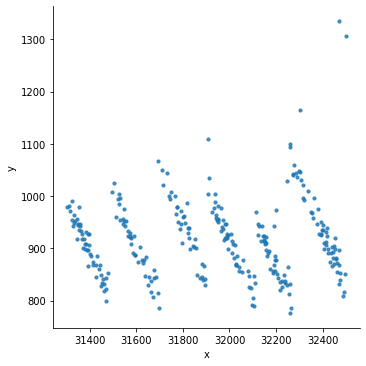

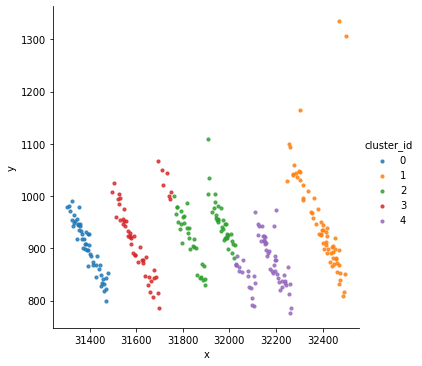

In [ ]:
sns.lmplot('x','y', data = df, fit_reg = False, scatter_kws={"s":10})
sns.lmplot('x','y',data=df,fit_reg = False, scatter_kws={"s":10},hue="cluster_id")

In [ ]:
'''
rank=0
index=str(ranking1[rank][0]) #1순위 구간이름 문자열로 변환
times=sorted(times.items(), key= lambda x: x[1], reverse= True)
print(times)

insider=0
outsider=0
mean=ranking1[0][1][1]
std=ranking1[0][1][2]
for i in range(len(times)):
  if times[i][0]>=mean+std:
    outsider+=times[i][1]
  else:
    insider+=times[i][1]
print("평균+표준편차보다 더 늦게 온 사람")
print(outsider, insider)
print((outsider/(insider+outsider))*100)

insider=0
outsider=0
for i in range(len(times)):
  if times[i][0]>=mean:
    outsider+=times[i][1]
  else:
    insider+=times[i][1]
print("평균보다 더 늦게 온 사람")
print(outsider, insider)
print((outsider/(insider+outsider))*100)
'''

'\nrank=0\nindex=str(ranking1[rank][0]) #1순위 구간이름 문자열로 변환\ntimes=sorted(times.items(), key= lambda x: x[1], reverse= True)\nprint(times)\n\ninsider=0\noutsider=0\nmean=ranking1[0][1][1]\nstd=ranking1[0][1][2]\nfor i in range(len(times)):\n  if times[i][0]>=mean+std:\n    outsider+=times[i][1]\n  else:\n    insider+=times[i][1]\nprint("평균+표준편차보다 더 늦게 온 사람")\nprint(outsider, insider)\nprint((outsider/(insider+outsider))*100)\n\ninsider=0\noutsider=0\nfor i in range(len(times)):\n  if times[i][0]>=mean:\n    outsider+=times[i][1]\n  else:\n    insider+=times[i][1]\nprint("평균보다 더 늦게 온 사람")\nprint(outsider, insider)\nprint((outsider/(insider+outsider))*100)\n'

마무리
------------------

In [ ]:
for i in range(len(flist)):
  tryf=flist[i]
  tryf.close()